# Intro to GUDHI libary 

In [140]:
import numpy as np
import pickle as pickle
import gudhi as gd  
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [141]:
point_cloud = np.array([[685, 452], [796, 476], [718, 563], [796, 616], [756, 697], [858, 669], [832, 748]])

In [142]:
def circle_through_points(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])
    
    if abs(det) < 1.0e-6:
        return (None, np.inf)
    
    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det
    
    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return cx, cy, radius

In [143]:
# plot edges and triangles
def plot_ctree(point_cloud, ctree, filtration_th, axs, xlim = [600, 950], ylim = [800, 400], circles = True):
    axs.scatter(point_cloud[:, 0], point_cloud[:, 1])

    for i in range(point_cloud.shape[0]):
        axs.annotate(i, (point_cloud[i, 0], point_cloud[i, 1]), fontsize=17)

    for simplex in ctree.get_filtration():
        if len(simplex[0]) == 2:
            axs.plot(point_cloud[simplex[0], 0], point_cloud[simplex[0], 1], 'k-')
        elif len(simplex[0]) == 3:
            axs.fill(point_cloud[simplex[0], 0], point_cloud[simplex[0], 1], 'blue', alpha=0.2)

    if circles:
        for i in range(point_cloud.shape[0]):
            circle = plt.Circle((point_cloud[i, 0], point_cloud[i, 1]), filtration_th, color='grey', alpha=0.2)
            axs.add_artist(circle)
    axs.invert_yaxis()
    axs.set_xlim(xlim)
    axs.set_ylim(ylim)


    return axs

In [144]:
ac = gd.AlphaComplex(points = point_cloud)
rc = gd.RipsComplex(points = point_cloud)

atree = ac.create_simplex_tree()
rtree = rc.create_simplex_tree(max_dimension=2)

In [145]:
fmt = '%s -> %.2f'
for filtered_value in atree.get_filtration():
    print(fmt % tuple(filtered_value))

for filtered_value in rtree.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[3, 5] -> 1663.25
[5, 6] -> 1729.25
[3, 4] -> 2040.25
[4, 6] -> 2094.25
[2, 3] -> 2223.25
[4, 5] -> 2797.00
[3, 4, 5] -> 2977.24
[4, 5, 6] -> 3016.41
[0, 1] -> 3224.25
[0, 2] -> 3352.50
[1, 2] -> 3413.25
[0, 1, 2] -> 4441.22
[1, 3] -> 4900.00
[2, 4] -> 4943.73
[2, 3, 4] -> 4943.73
[1, 2, 3] -> 4989.16
[1, 5] -> 17780.42
[1, 3, 5] -> 17780.42
[0, 4] -> 101686732.05
[0, 2, 4] -> 101686732.05
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[3, 5] -> 81.57
[5, 6] -> 83.17
[3, 4] -> 90.34
[4, 6] -> 91.53
[2, 3] -> 94.30
[4, 5] -> 105.77
[3, 4, 5] -> 105.77
[4, 5, 6] -> 105.77
[0, 1] -> 113.56
[0, 2] -> 115.80
[1, 2] -> 116.85
[0, 1, 2] -> 116.85
[3, 6] -> 136.82
[3, 4, 6] -> 136.82
[3, 5, 6] -> 136.82
[2, 4] -> 139.28
[2, 3, 4] -> 139.28
[1, 3] -> 140.00
[1, 2, 3] -> 140.00
[2, 5] -> 175.60
[2, 3, 5] -> 175.60
[2, 4, 5] -> 175.60
[0, 3] -> 198.03
[0, 1, 3] -> 198.03
[0, 2,

In [146]:
atree.prune_above_filtration(3500)
rtree.prune_above_filtration(116.9)

True

In [147]:
atree.compute_persistence()
rtree.compute_persistence()

print(f"Betti numbers alpha: {atree.betti_numbers()}")
print(f"Betti numbers rlpha: {atree.betti_numbers()}")

Betti numbers alpha: [1, 1]
Betti numbers rlpha: [1, 1]


Text(0.5, 1.0, 'Rips complex')

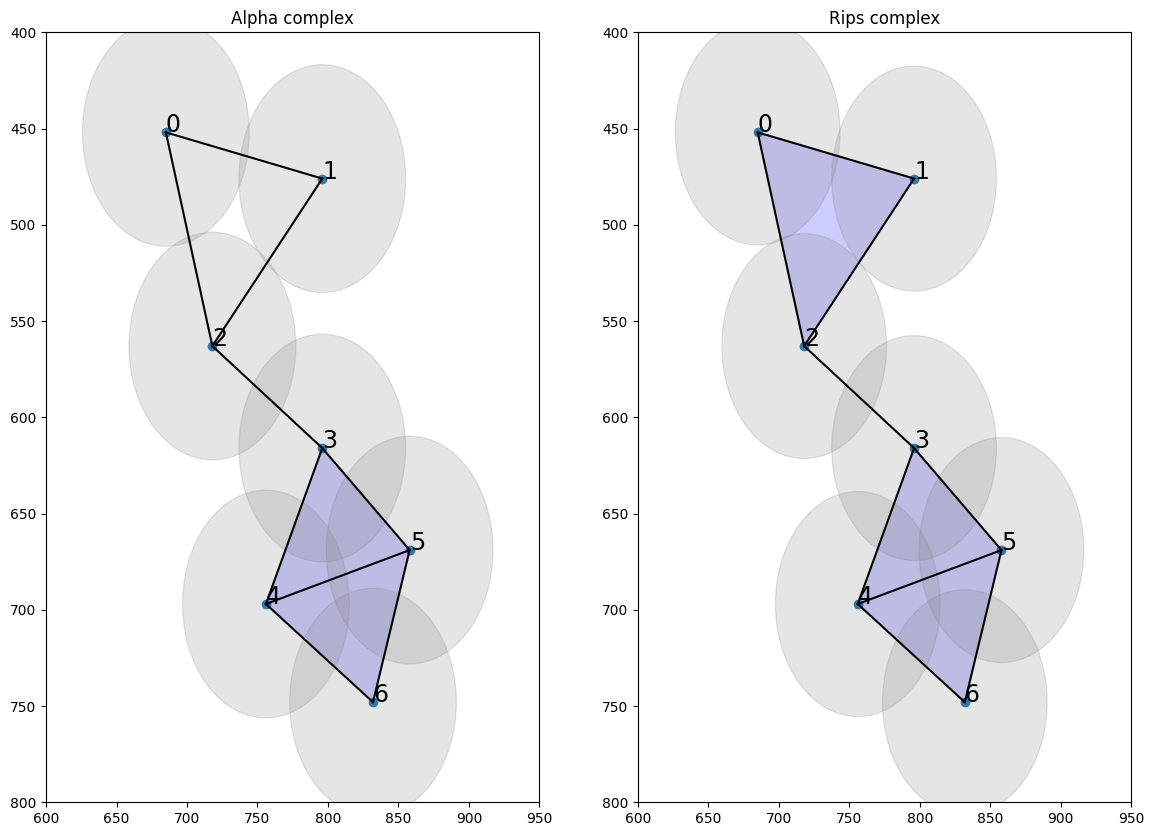

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

plot_ctree(point_cloud, atree, np.sqrt(3500), axs[0])
axs[0].set_title('Alpha complex')

plot_ctree(point_cloud, rtree, 116.9/2, axs[1])
axs[1].set_title('Rips complex')

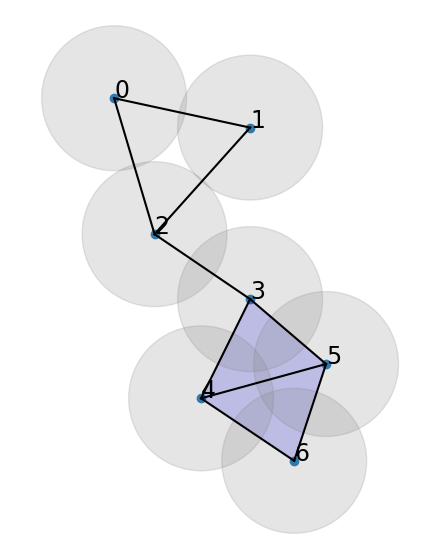

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

plot_ctree(point_cloud, atree, np.sqrt(3500), ax)
ax.set_aspect('equal')
ax.set_ylim([820, 380])

ax.set_axis_off()
fig.tight_layout()
fig.savefig('alpha_complex.png', dpi=300)

/Users/astaburhenne/Desktop/TDA/tdaenv/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


Text(0.5, 1.0, 'Rips complex - persistence barcode')

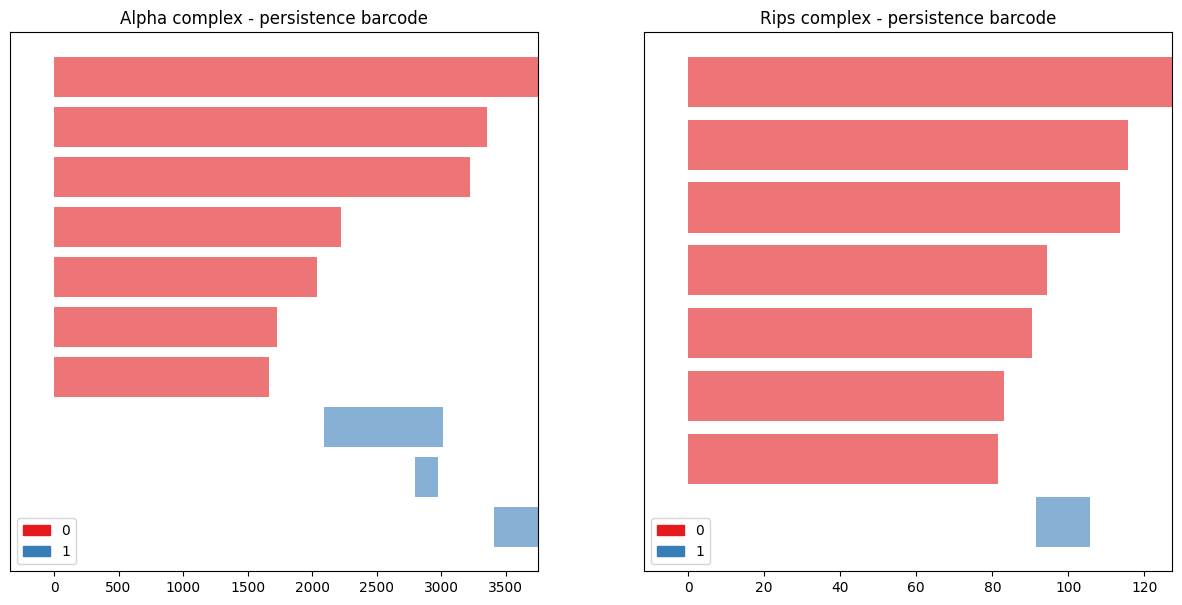

In [10]:
import matplotlib.pyplot as plt
import gudhi as gd

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sdgm = atree.persistence()
rdgm = rtree.persistence() 

gd.plot_persistence_barcode(sdgm, axes = axs[0])
axs[0].set_title('Alpha complex - persistence barcode')

gd.plot_persistence_barcode(rdgm, axes = axs[1])
axs[1].set_title('Rips complex - persistence barcode')

Text(0.5, 1.0, 'Rips complex - Persistence diagram')

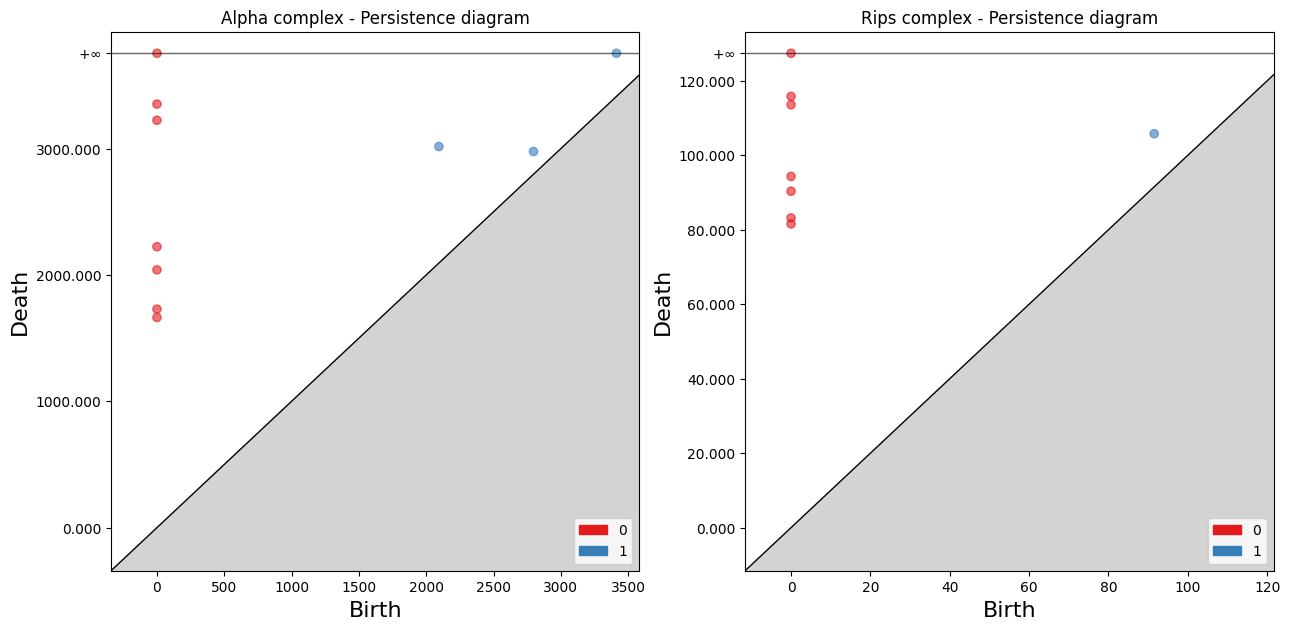

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))

gd.plot_persistence_diagram(sdgm, legend = True, axes=axs[0])
axs[0].set_title('Alpha complex - Persistence diagram')

gd.plot_persistence_diagram(rdgm, legend = True, axes=axs[1])
axs[1].set_title('Rips complex - Persistence diagram')

# Impact of noise

In [12]:
point_cloud1 = np.array([[685, 452], [796, 476], [718, 563], [796, 616], [756, 697], [858, 669], [832, 748]])
point_cloud2 = np.array([[685, 452], [796, 476], [718, 563], [796, 616], [756, 697], [858, 669], [832, 748]])

# add noise to point zero in point_cloud2
point_cloud2[0] = [685 + 25, 452 + 25]

In [13]:
ac1 = gd.AlphaComplex(points = point_cloud1)
ac2 = gd.AlphaComplex(points = point_cloud2)

atree1 = ac1.create_simplex_tree()
atree2 = ac2.create_simplex_tree()

Text(0.5, 1.0, 'Persistence barcode with noise')

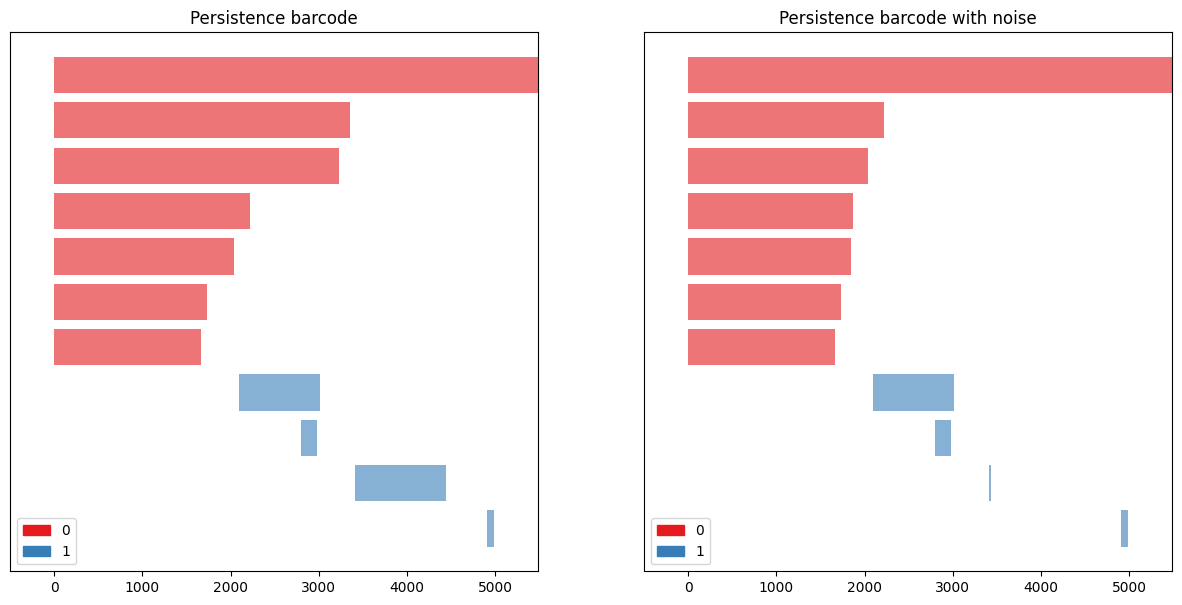

In [14]:
import matplotlib.pyplot as plt
import gudhi as gd

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sdgm1 = atree1.persistence()
sdgm2 = atree2.persistence() 

gd.plot_persistence_barcode(sdgm1, axes = axs[0])
axs[0].set_title('Persistence barcode')

gd.plot_persistence_barcode(sdgm2, axes = axs[1])
axs[1].set_title('Persistence barcode with noise')

Text(0.5, 1.0, 'Alpha complex with noise')

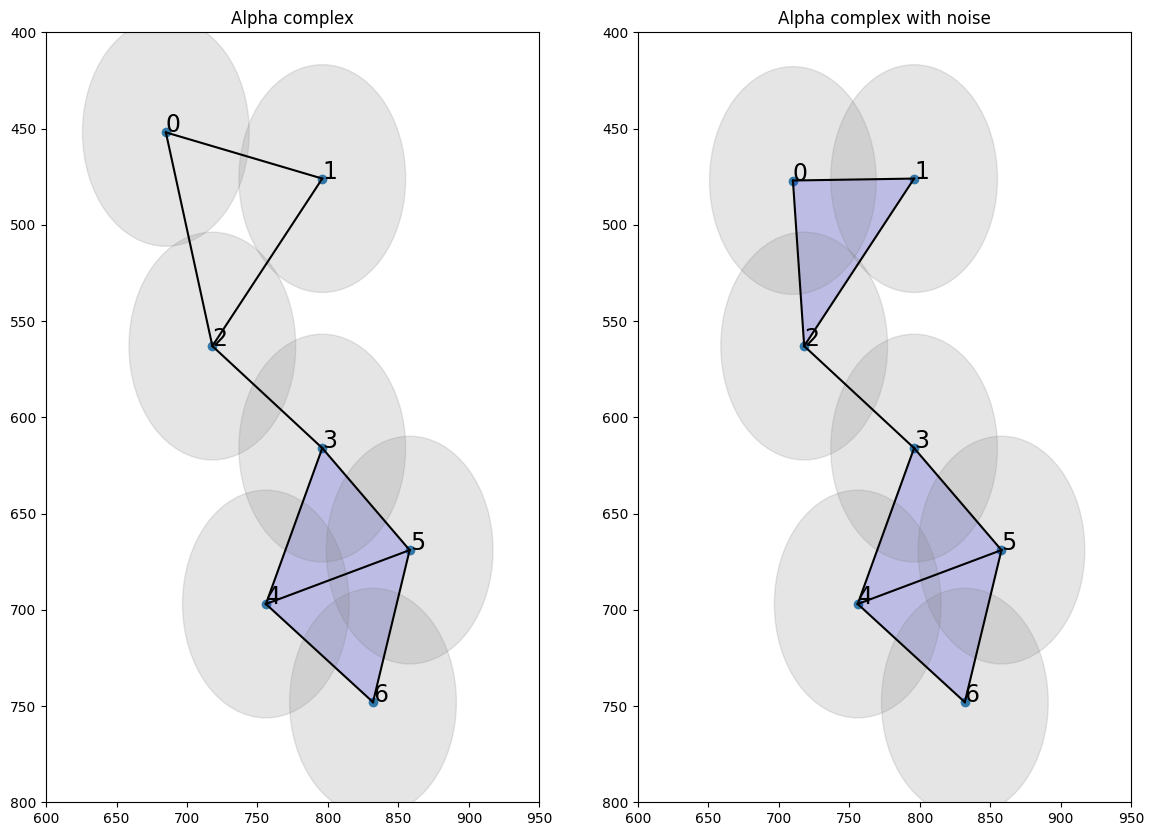

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

atree1.prune_above_filtration(3500)
atree2.prune_above_filtration(3500)

plot_ctree(point_cloud1, atree1, np.sqrt(3500), axs[0])
axs[0].set_title('Alpha complex')

plot_ctree(point_cloud2, atree2, np.sqrt(3500), axs[1])
axs[1].set_title('Alpha complex with noise')

# Imapct of triangulation 

In [16]:
point_cloud_t = np.array([[0.0,2], [0.8,1.5], [-0.8,1.5], [0.0,0.0]])
# Rotate point cloud with 90 degrees
point_cloud_t_90 = np.array([[0.0,2], [0.8,1.75], [-0.8,1.75], [0.0,0.0]])

In [17]:
ac_t = gd.AlphaComplex(points = point_cloud_t)
ac_t_90 = gd.AlphaComplex(points = point_cloud_t_90)
atree_t = ac_t.create_simplex_tree()
atree_t_90 = ac_t_90.create_simplex_tree()

In [18]:
atree_t.compute_persistence()
atree_t_90.compute_persistence()

for filtered_value in atree_t.get_filtration():
    print(fmt % tuple(filtered_value))

for filtered_value in atree_t_90.get_filtration():
    print(fmt % tuple(filtered_value))

print(f"Betti numbers: {atree_t.betti_numbers()}")
print(f"Betti numbers: {atree_t_90.betti_numbers()}")

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[0, 1] -> 0.22
[0, 2] -> 0.22
[1, 3] -> 0.72
[2, 3] -> 0.72
[1, 2] -> 0.79
[0, 1, 2] -> 0.79
[1, 2, 3] -> 0.93
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[0, 1] -> 0.18
[0, 2] -> 0.18
[1, 3] -> 0.93
[2, 3] -> 0.93
[0, 3] -> 1.00
[0, 1, 3] -> 1.02
[0, 2, 3] -> 1.02
Betti numbers: [1, 0]
Betti numbers: [1, 0]


In [19]:
 circle_through_points(point_cloud_t_90[0], point_cloud_t_90[2], point_cloud_t_90[3])

(-0.12656250000000008, 1.0, 1.0079772152217776)

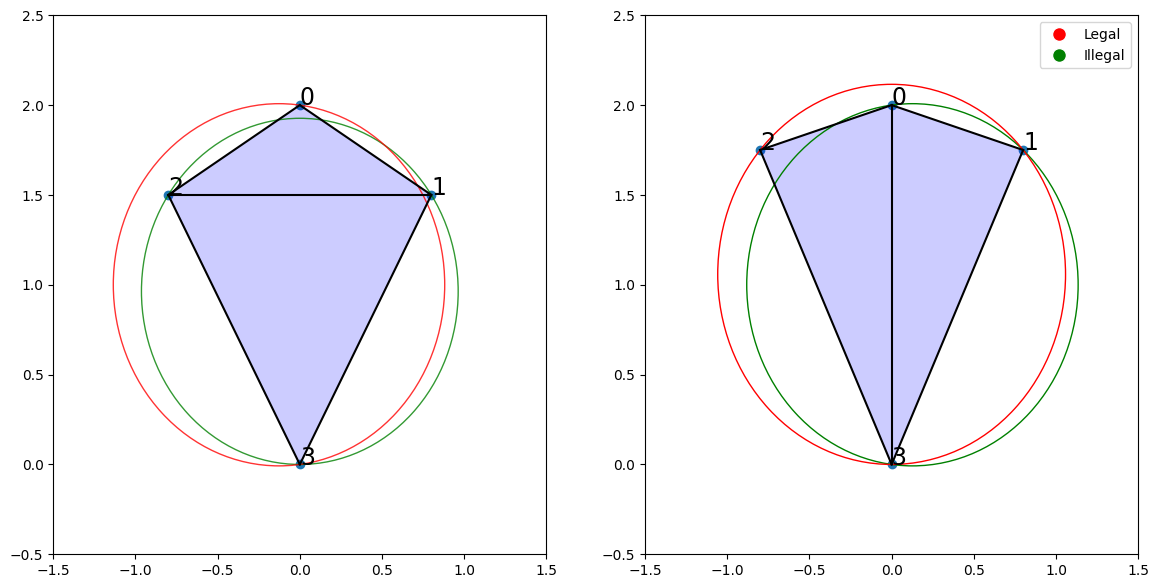

In [20]:
#Center: (0.275, 0.2500000000000001), Radius: 1.7714753738056874

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

center_x, center_y, radius = circle_through_points(point_cloud_t[0], point_cloud_t[1], point_cloud_t[2])
center_x1, center_y1, radius1 = circle_through_points(point_cloud_t[1], point_cloud_t[2], point_cloud_t[3])
center_x3, center_y3, radius3 = circle_through_points(point_cloud_t_90[0], point_cloud_t_90[2], point_cloud_t_90[3])
center_x2, center_y2, radius2 = circle_through_points(point_cloud_t_90[0], point_cloud_t_90[1], point_cloud_t_90[3])

plot_ctree(point_cloud_t, atree_t, 1.7714753738056874, ax[0], xlim= [-2,2], ylim=[-0.5,2.5], circles = False)
# no fill in circle
#circle1 = plt.Circle((center_x, center_y), radius, color='green', alpha=0.8, fill=False)
circle2 = plt.Circle((center_x1, center_y1), radius1, color='green', alpha=0.8, fill=False, label = 'Legal - p1, p2, p3')
#circle3 = plt.Circle((center_x2, center_y2), radius2, color='red', alpha=0.8, fill=False)
circle4 = plt.Circle((center_x3, center_y3), radius3, color='red', alpha=0.8, fill=False, label = 'Illegal - p0, p2, p3')
#ax[0].add_artist(circle1)
ax[0].add_artist(circle2)
#ax[0].add_artist(circle3)
ax[0].add_artist(circle4)
ax[0].set_xlim([-1.5, 1.5])


center_x, center_y, radius = circle_through_points(point_cloud_t_90[0], point_cloud_t_90[1], point_cloud_t_90[2])
center_x1, center_y1, radius1 = circle_through_points(point_cloud_t_90[0], point_cloud_t_90[2], point_cloud_t_90[3])
center_x2, center_y2, radius2 = circle_through_points(point_cloud_t_90[0], point_cloud_t_90[1], point_cloud_t_90[3])
center_x3, center_y3, radius3 = circle_through_points(point_cloud_t_90[1], point_cloud_t_90[2], point_cloud_t_90[3])

plot_ctree(point_cloud_t_90, atree_t_90, 1.7714753738056874, ax[1], xlim= [-2,2], ylim=[-0.5,2.5], circles = False)
# no fill in circle
#circle1_t = plt.Circle((center_x, center_y), radius, color='red', alpha=0.8, fill=False)
#circle2_t = plt.Circle((center_x1, center_y1), radius1, color='green', alpha=0.5, fill=False)
circle3_t = plt.Circle((center_x2, center_y2), radius2, color='green', alpha=1, fill=False, label='Legal - p0, p1, p3') 
circle4_t = plt.Circle((center_x3, center_y3), radius3, color='red', alpha=1, fill=False, label='Illegal - p1, p2, p3')
#ax[1].add_artist(circle1_t)
#ax[1].add_artist(circle2_t)
ax[1].add_artist(circle3_t)
ax[1].add_artist(circle4_t)
ax[1].set_xlim([-1.5, 1.5])

# Add legend
#plt.legend()

# Add legend outside of the subplots
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Circle', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Circle', markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, labels=['Legal', 'Illegal'], loc='upper right')

#plt.legend([circle2, circle4], ['Legal', 'Illegal'], loc='upper right')

plt.show()

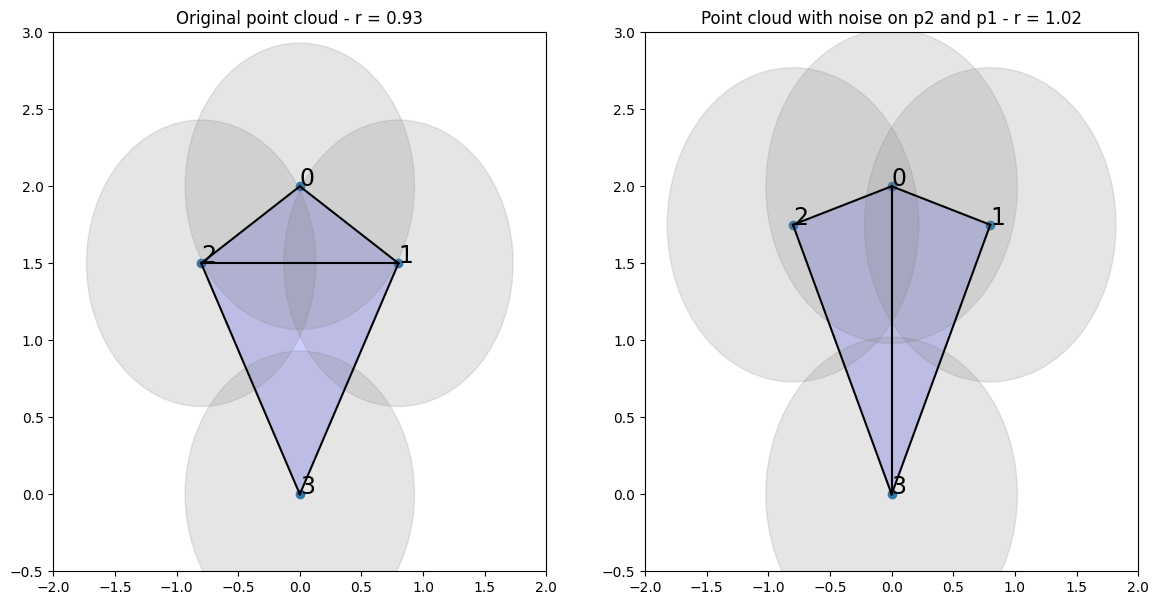

In [22]:
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
plot_ctree(point_cloud_t, atree_t , 0.93, axs = axs[0], xlim = [-2, 2], ylim = [-0.5, 3])
axs[0].set_title('Original point cloud - r = 0.93')

plot_ctree(point_cloud_t_90, atree_t_90, 1.02, axs = axs[1], xlim = [-2, 2], ylim = [-0.5, 3])
axs[1].set_title('Point cloud with noise on p2 and p1 - r = 1.02')

plt.savefig('alpha.png')

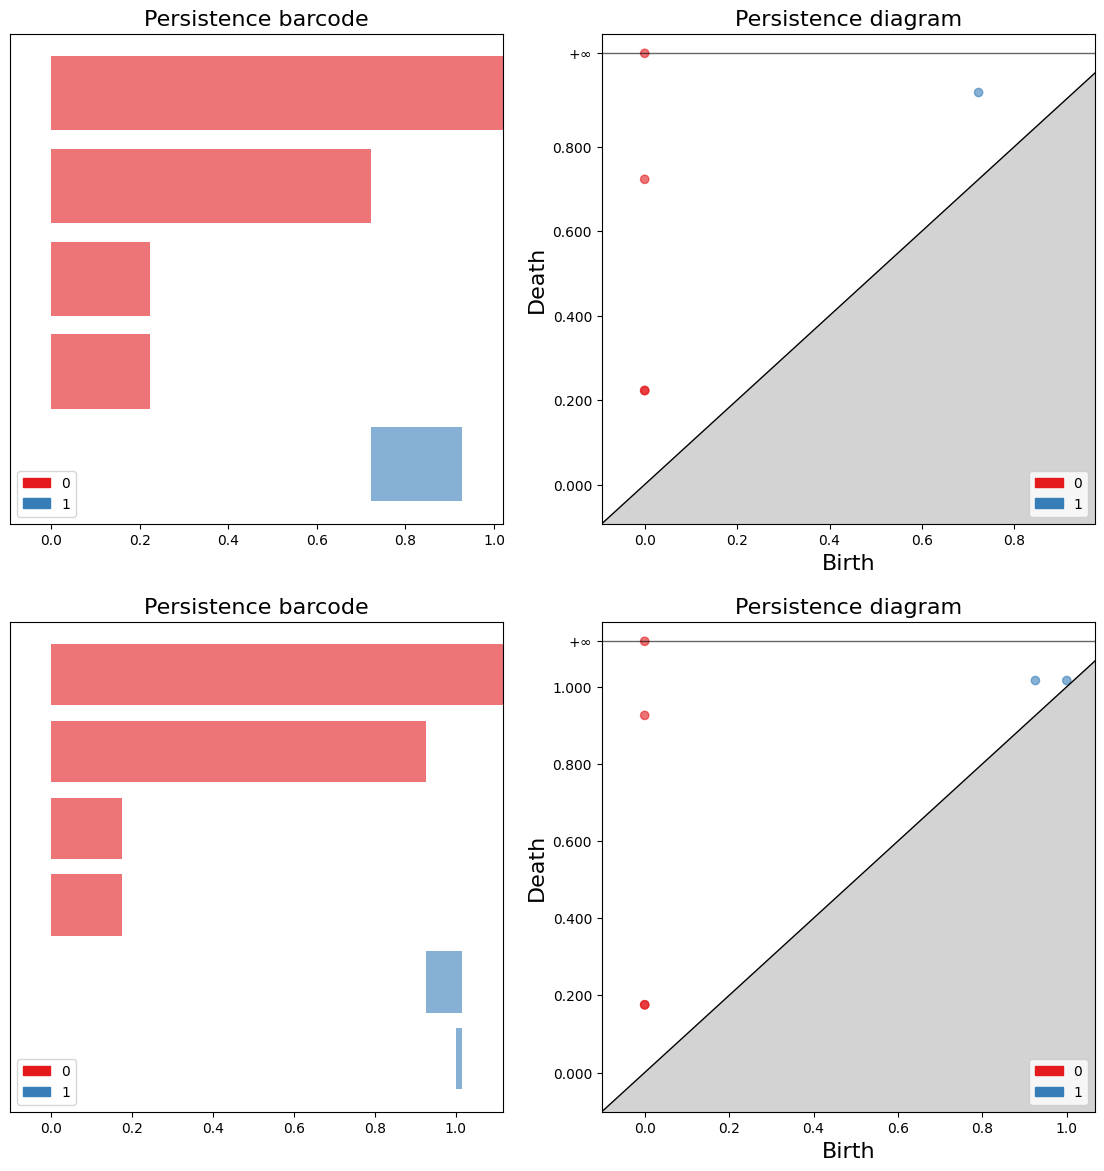

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
gd.plot_persistence_barcode(atree_t.persistence(), axes= axs[0,0])
gd.plot_persistence_diagram(atree_t.persistence(), axes= axs[0,1])

gd.plot_persistence_barcode(atree_t_90.persistence(), axes= axs[1,0])
gd.plot_persistence_diagram(atree_t_90.persistence(), axes= axs[1,1])

plt.savefig('alpha_persistence.png')

In [132]:
rc_t = gd.RipsComplex(points = point_cloud_t)
rc_t_90 = gd.RipsComplex(points = point_cloud_t_90)
rtree_t = rc_t.create_simplex_tree(max_dimension=2)
rtree_t_90 = rc_t_90.create_simplex_tree(max_dimension=2)

In [134]:
rtree_t.compute_persistence()
rtree_t_90.compute_persistence()

for filtered_value in rtree_t.get_filtration():
    print(fmt % tuple(filtered_value))

for filtered_value in rtree_t_90.get_filtration():
    print(fmt % tuple(filtered_value))

print(f"Betti numbers: {rtree_t.betti_numbers()}")
print(f"Betti numbers: {rtree_t_90.betti_numbers()}")

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[0, 1] -> 0.94
[0, 2] -> 0.94
[1, 2] -> 1.60
[0, 1, 2] -> 1.60
[1, 3] -> 1.70
[2, 3] -> 1.70
[1, 2, 3] -> 1.70
[0, 3] -> 2.00
[0, 1, 3] -> 2.00
[0, 2, 3] -> 2.00
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[0, 1] -> 0.84
[0, 2] -> 0.84
[1, 2] -> 1.60
[0, 1, 2] -> 1.60
[1, 3] -> 1.92
[2, 3] -> 1.92
[1, 2, 3] -> 1.92
[0, 3] -> 2.00
[0, 1, 3] -> 2.00
[0, 2, 3] -> 2.00
Betti numbers: [1, 0]
Betti numbers: [1, 0]


Text(0.5, 1.0, 'Rotated point cloud')

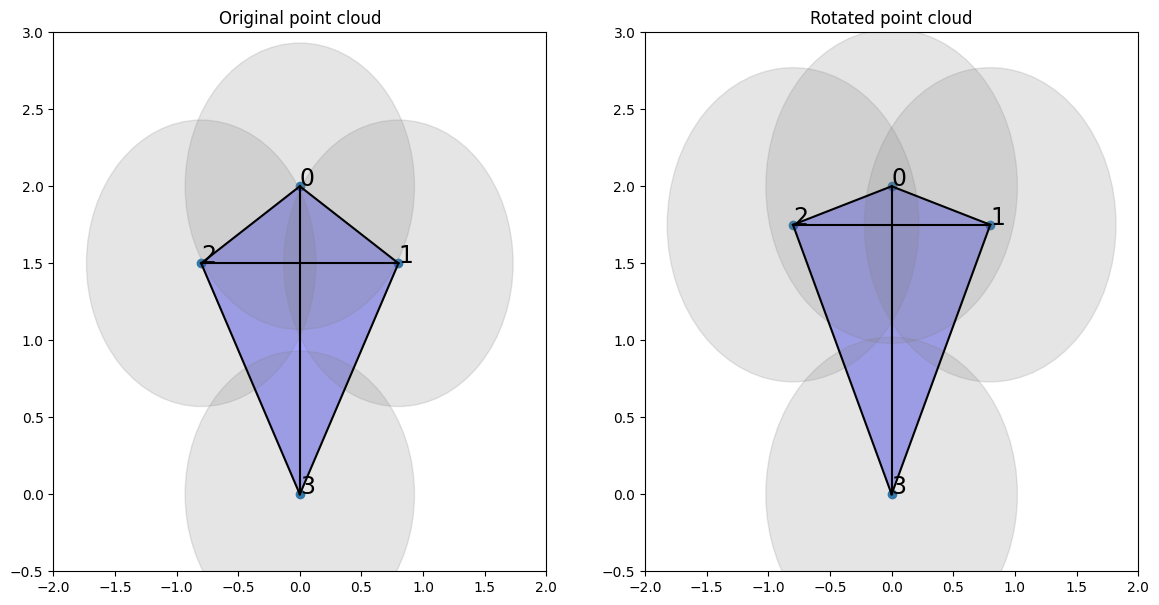

In [135]:
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
plot_ctree(point_cloud_t, rtree_t , 0.93, axs = axs[0], xlim = [-2, 2], ylim = [-0.5, 3])
axs[0].set_title('Original point cloud')

plot_ctree(point_cloud_t_90, rtree_t_90, 1.02, axs = axs[1], xlim = [-2, 2], ylim = [-0.5, 3])
axs[1].set_title('Rotated point cloud')

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

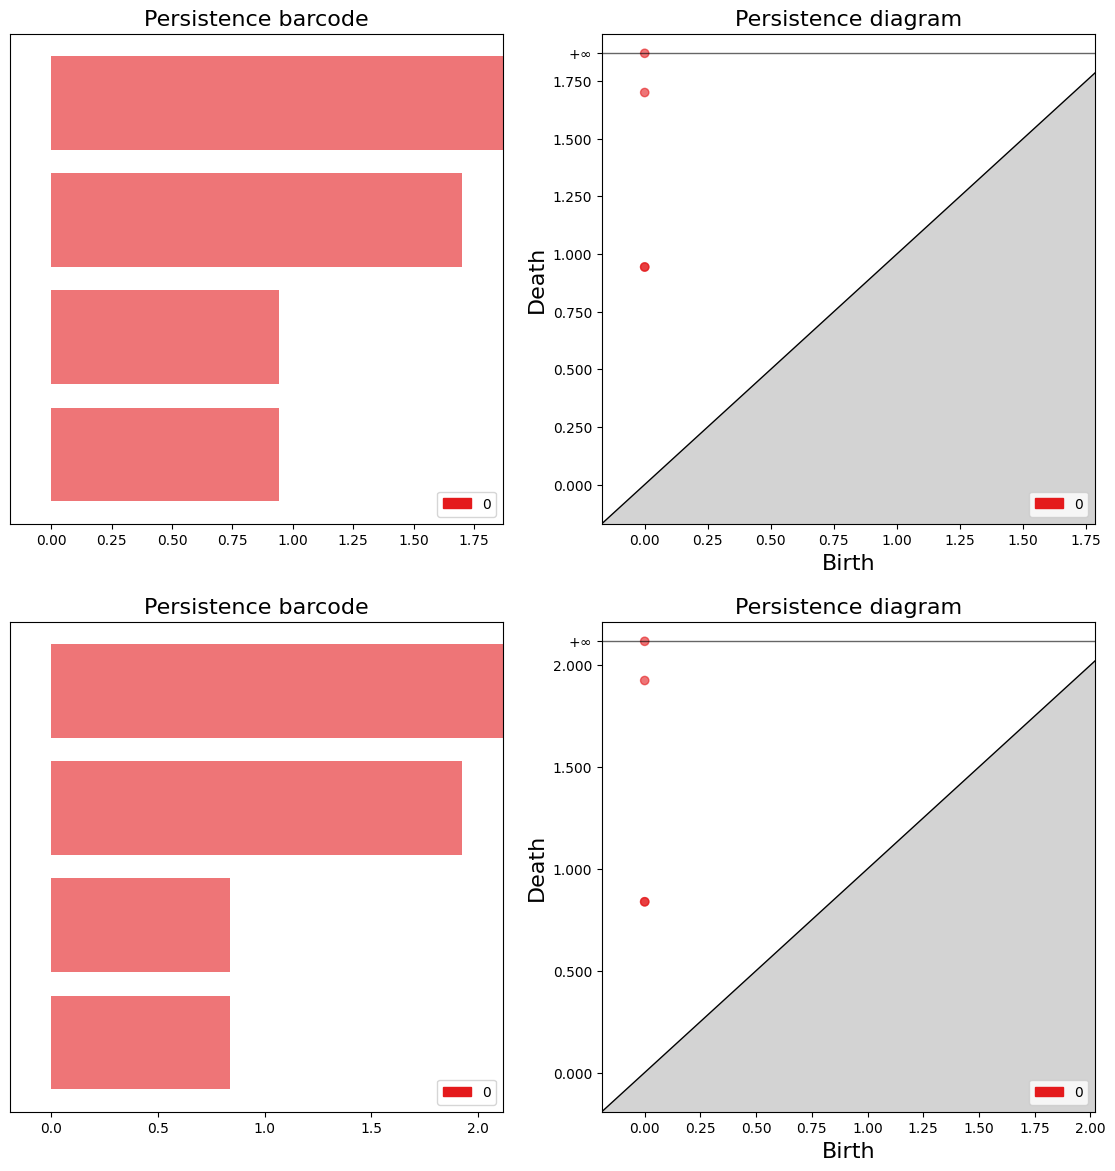

In [136]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
gd.plot_persistence_barcode(rtree_t.persistence(), axes= axs[0,0])
gd.plot_persistence_diagram(rtree_t.persistence(), axes= axs[0,1])

gd.plot_persistence_barcode(rtree_t_90.persistence(), axes= axs[1,0])
gd.plot_persistence_diagram(rtree_t_90.persistence(), axes= axs[1,1])

In [139]:
dgm1 = atree_t.persistence()
dgm2 = atree_t_90.persistence()

In [143]:
dgm1t = np.array([np.array(t[1]) for t in dgm1])
dgm2t = np.array([np.array(t[1]) for t in dgm2])

In [144]:
gd.bottleneck_distance(dgm1t, dgm2t)

0.203125

In [157]:
def circle_through_points(point1, point2, point3):

    # Coordinates of the three points
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3

    # Midpoints of the line segments
    mx1, my1 = (x1 + x2) / 2, (y1 + y2) / 2
    mx2, my2 = (x2 + x3) / 2, (y2 + y3) / 2

    # Slopes of the perpendicular bisectors
    slope1 = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')
    slope2 = (y3 - y2) / (x3 - x2) if x3 != x2 else float('inf')

    # Check for collinear points
    if slope1 == slope2:
        return None  # Points are collinear, no unique circle exists

    # Center coordinates
    center_x = (slope1 * slope2 * (my1 - my2) + slope2 * (mx1 + mx2) - slope1 * (mx2 + mx1)) / (2 * (slope2 - slope1))
    center_y = -1 / slope1 * (center_x - (mx1 + mx2) / 2) + (my1 + my2) / 2

    # Radius
    radius = ((center_x - x1)**2 + (center_y - y1)**2)**0.5

    return center_x, center_y, radius

In [175]:
# Example usage
point1 = (0.0, 2.0)
point2 = (0.8, 1.5)
point3 = (2, 0)

result = circle_through_points(point1, point2, point3)

if result:
    center_x, center_y, radius = result
    print(f"Center: ({center_x}, {center_y}), Radius: {radius}")
else:
    print("Collinear points, no unique circle exists.")

Center: (0.275, 0.2500000000000001), Radius: 1.7714753738056874


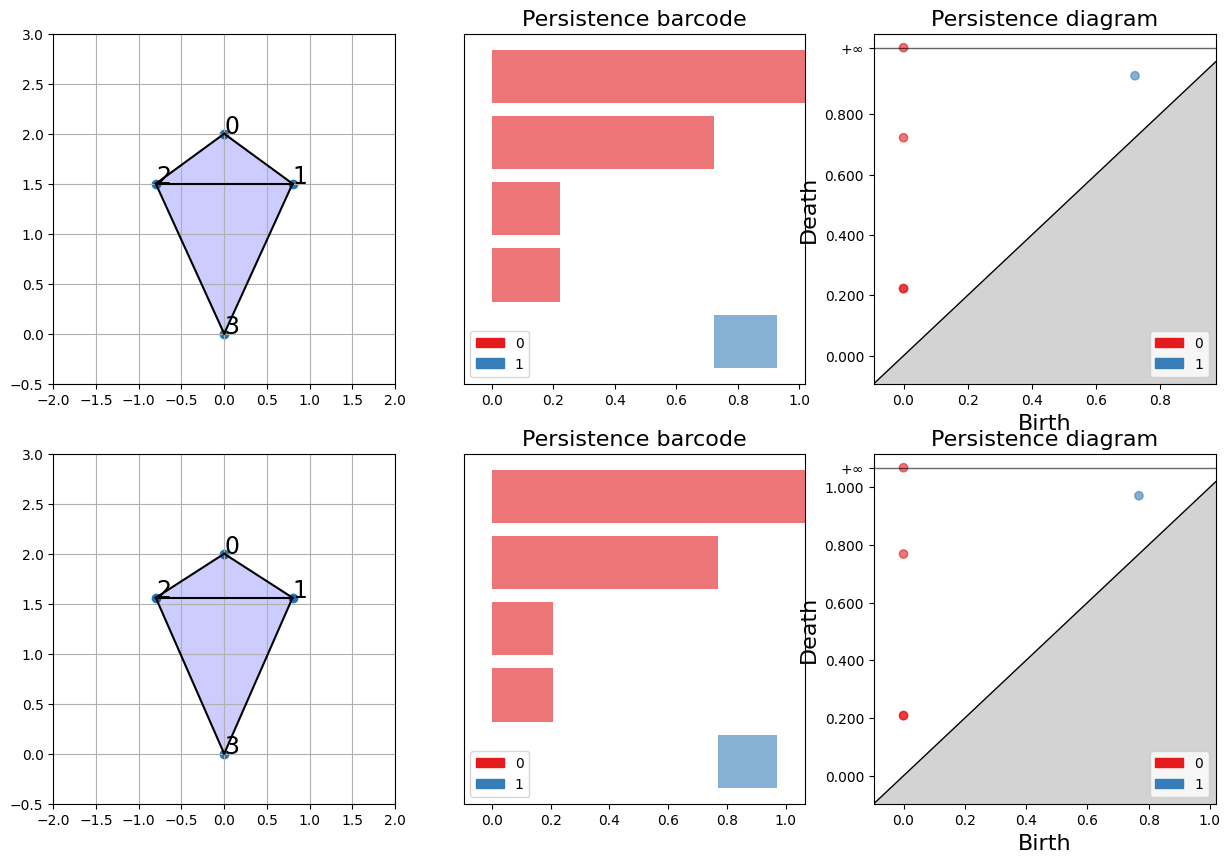

In [134]:
point_cloud = np.array([[0.0,2], [0.8,1.5], [-0.8,1.5], [0.0,0.0]])

add = np.array([[0.0, 0.0], [0.0, 0.03], [0.0, 0.03], [0.0, 0.0]])

ac = gd.AlphaComplex(points = point_cloud)
atree = ac.create_simplex_tree()
atree.compute_persistence()


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plot_ctree(point_cloud, atree, 0, axs[0,0], xlim = [-2, 2], ylim = [-0.5, 3])
#add grid
axs[0,0].grid()

gd.plot_persistence_barcode(atree.persistence(), axes = axs[0,1])
gd.plot_persistence_diagram(atree.persistence(), axes = axs[0,2])

point_cloud += 2 * add

ac = gd.AlphaComplex(points = point_cloud)
atree = ac.create_simplex_tree()
atree.compute_persistence()

plot_ctree(point_cloud, atree, 0, axs[1,0], xlim = [-2, 2], ylim = [-0.5, 3])
#add grid
axs[1,0].grid()

gd.plot_persistence_barcode(atree.persistence(), axes = axs[1,1])

gd.plot_persistence_diagram(atree.persistence(), axes = axs[1,2])

fig.savefig('alpha_complex_equal.png')



In [127]:
point_cloud = np.array([[0.0,2], [0.8,1.5], [-0.8,1.5], [0.0,0.0]])

add = np.array([[0.0, 0.0], [0.0, 0.01], [0.0, 0.01], [0.0, 0.0]])

ac = gd.AlphaComplex(points = point_cloud)
atree = ac.create_simplex_tree()
dgm0 = atree.persistence()

dgm0

In [125]:
def dgm_k(dgm,k):
    return np.array([[b,d] for (h,(b,d)) in dgm if h == k])

In [137]:
point_cloud = np.array([[0.0,2], [0.8,1.5], [-0.8,1.5], [0.0,0.0]])

x = np.linspace(0.01, 0.11, 100)

ac = gd.AlphaComplex(points = point_cloud)
atree = ac.create_simplex_tree()
dgm0 = atree.persistence()

dgm0_0 = dgm_k(dgm0,0)
dgm0_1 = dgm_k(dgm0,1)

d1_dist = []
d0_dist = []

for i in x:
    point_cloud = np.array([[0.0,2], [0.8,1.5], [-0.8,1.5], [0.0,0.0]])
    add = np.array([[0.0, 0.0], [0.0, i], [0.0, i], [0.0, 0.0]])
    point_cloud += add
    ac = gd.AlphaComplex(points = point_cloud)
    atree = ac.create_simplex_tree()
    dgm1 = atree.persistence()
    dgm1_0 = dgm_k(dgm1,0)
    dgm1_1 = dgm_k(dgm1,1)

    d1_dist.append(gd.bottleneck_distance(dgm0_1, dgm1_1))
    d0_dist.append(gd.bottleneck_distance(dgm0_0, dgm1_0))

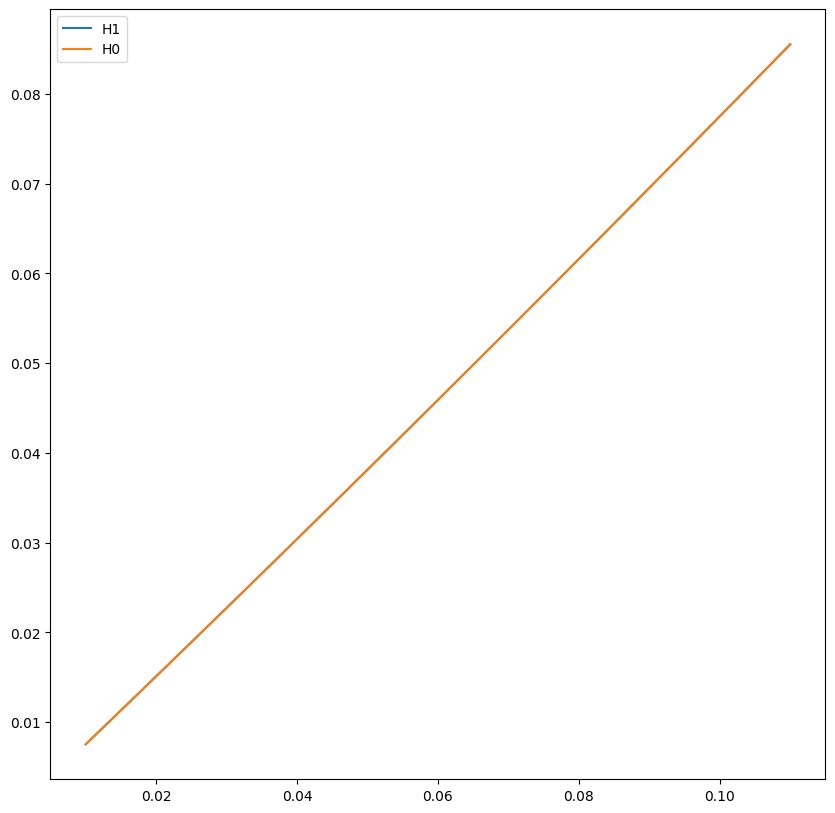

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(x, d1_dist, label = 'H1')
ax.plot(x, d0_dist, label = 'H0')

ax.legend()

In [44]:
point_cloud_1 = np.array([[0.0,2], [0.8,1.5], [-0.8,1.5], [0.0,0.0]])
point_cloud_2 = np.array([[0.0,2], [0.8,1.7], [-0.8,1.7], [0.0,0.0]])

In [103]:

def plot_time(point_cloud):
    ac = gd.AlphaComplex(points = point_cloud)
    atree = ac.create_simplex_tree()
    filt = atree.get_filtration()
    persistence = atree.persistence()
    print(persistence)
    filtration = []
    for filtered_value in filt:
        filtration.append([filtered_value[0], filtered_value[1]])
    time = np.unique([t[1] for t in filtration])

    fig, ax = plt.subplots(2, len(time), figsize=(25, 10))
    for i, t in enumerate(time):
        ac = gd.AlphaComplex(points = point_cloud)
        atree = ac.create_simplex_tree()
        filt = atree.get_filtration()
        persistence = atree.persistence()

        atree.prune_above_filtration(t+0.01)

        ax[0,i].scatter(point_cloud[:, 0], point_cloud[:, 1])
        ax[0,i].set_title(f't = {t:.2f}')
        ax[0,i].grid()
        for filtered_value in atree.get_filtration():
            if len(filtered_value[0]) == 2:
                ax[0,i].plot(point_cloud[filtered_value[0], 0], point_cloud[filtered_value[0], 1], 'k-')
            elif len(filtered_value[0]) == 3:
                ax[0,i].fill(point_cloud[filtered_value[0], 0], point_cloud[filtered_value[0], 1], 'blue', alpha=0.2)
        ax[0,i].invert_yaxis()
        ax[0,i].set_xlim([-2, 2])
        ax[0,i].set_ylim([-0.5, 3])

        # filter persistence where death time is less than t
        persistence_t = [(h, (b,d)) for (h, (b,d)) in persistence if d <= t]
        gd.plot_persistence_barcode(persistence_t, axes = ax[1,i])

[(1, (0.7224999999999999, 0.9280111111111113)), (0, (0.0, inf)), (0, (0.0, 0.7224999999999999)), (0, (0.0, 0.22250000000000003)), (0, (0.0, 0.22250000000000003))]


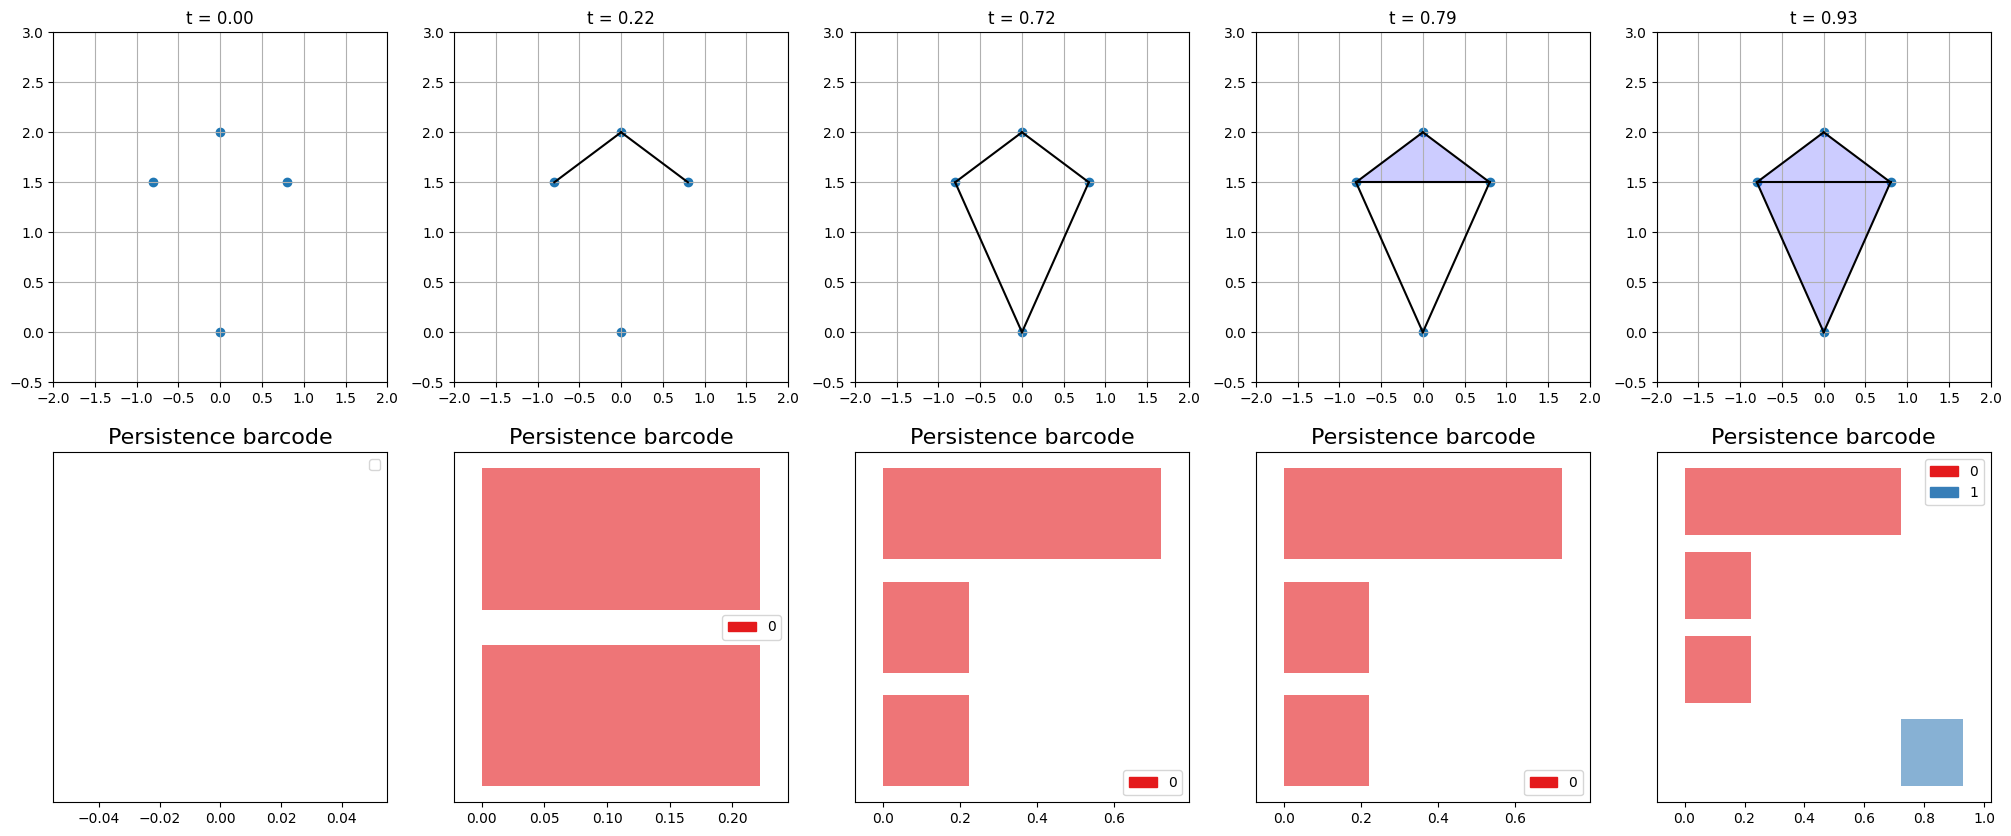

In [104]:
plot_time(point_cloud_1)

[(1, (0.8825, 1.0066015625000002)), (1, (1.0, 1.0066015625000002)), (0, (0.0, inf)), (0, (0.0, 0.8825)), (0, (0.0, 0.18250000000000002)), (0, (0.0, 0.18250000000000002))]


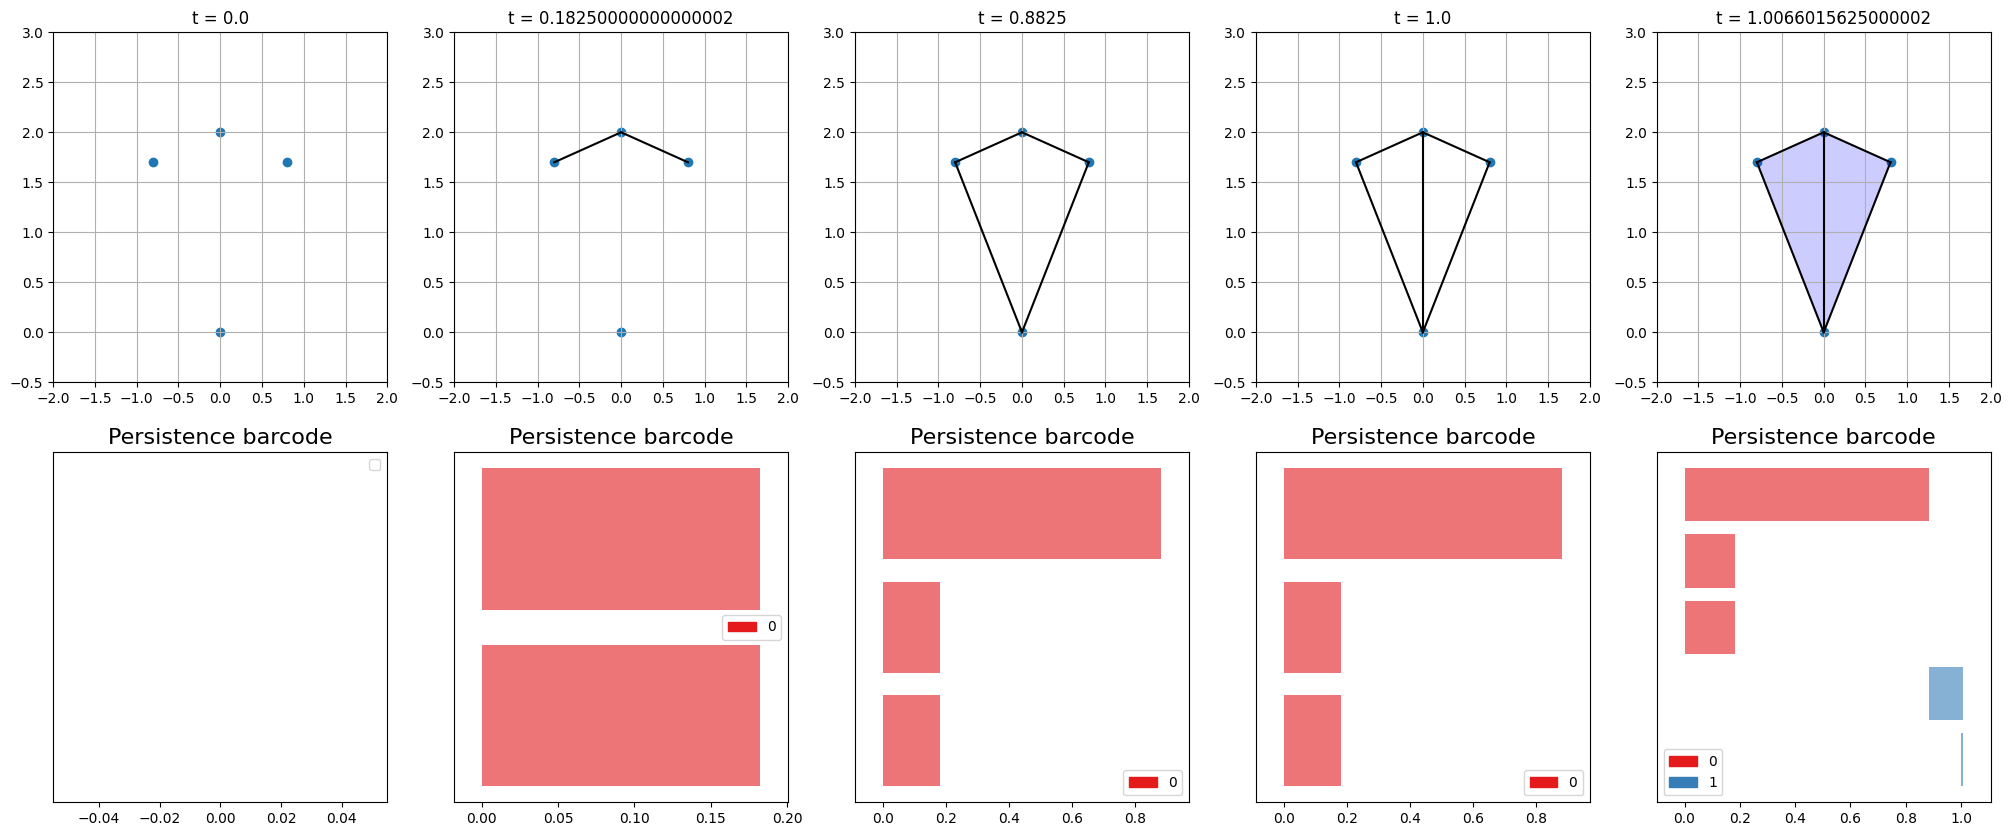

In [100]:
plot_time(point_cloud_2)

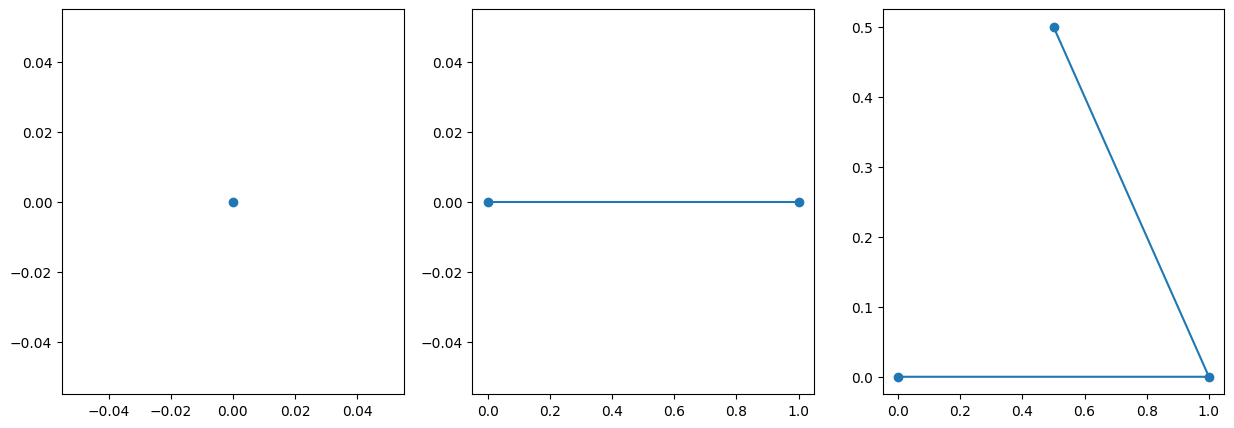

In [139]:
# Create diagram showig 3 dimensions of simplices

vertex = np.array([0,0])
edge = np.array([[0,0], [1,0]])
triangle = np.array([[0,0], [1,0], [0.5, 0.5]])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(vertex[0], vertex[1])

ax[1].scatter(edge[:, 0], edge[:, 1])
ax[1].plot(edge[:, 0], edge[:, 1])

ax[2].scatter(triangle[:, 0], triangle[:, 1])
ax[2].plot(triangle[:, 0], triangle[:, 1])




